In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
batch_size = 128
num_classes = 10
epochs = 20

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 18s 35ms/step - loss: 0.2643 - accuracy: 0.9201 - val_loss: 0.1212 - val_accuracy: 0.9609
Epoch 2/20
469/469 [==============================] - 15s 31ms/step - loss: 0.1123 - accuracy: 0.9664 - val_loss: 0.0797 - val_accuracy: 0.9749
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.0800 - val_accuracy: 0.9742
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0657 - accuracy: 0.9806 - val_loss: 0.0689 - val_accuracy: 0.9799
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0561 - accuracy: 0.9835 - val_loss: 0.0689 - val_accuracy: 0.9814
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0730 - val_accuracy: 0.9822
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0774 - val_accuracy: 0.9

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.11991069465875626
Test accuracy: 0.9825999736785889
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


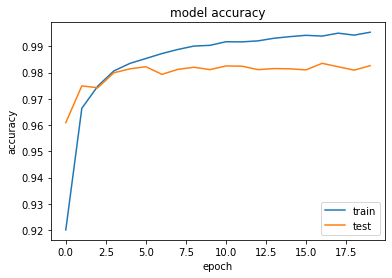

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [11]:
# Second Model

In [12]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.6000 - accuracy: 0.8134 - val_loss: 0.2001 - val_accuracy: 0.9417
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2693 - accuracy: 0.9290 - val_loss: 0.1430 - val_accuracy: 0.9595
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2167 - accuracy: 0.9448 - val_loss: 0.1330 - val_accuracy: 0.9659
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1868 - accuracy: 0.9527 - val_loss: 0.1149 - val_accuracy: 0.9699
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1788 - accuracy: 0.9552 - val_loss: 0.1197 - val_accuracy: 0.9707
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1680 - accuracy: 0.9589 - val_loss: 0.1141 - val_accuracy: 0.9742
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1652 - accuracy: 0.9613 - val_loss: 0.1050 - val_accuracy: 0.9741

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.14434494078159332
Test accuracy: 0.9761999845504761
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
# Model 3

In [16]:
#i am running a thurd model with other configuration
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(784,)))
model.add(Dropout(0.7))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
epochs = 25

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               60300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               75250     
_________________________________________________________________
dropout_7 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [18]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 6s 9ms/step - loss: 1.0577 - accuracy: 0.6430 - val_loss: 0.3056 - val_accuracy: 0.9188
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.5156 - accuracy: 0.8632 - val_loss: 0.2444 - val_accuracy: 0.9358
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.4495 - accuracy: 0.8861 - val_loss: 0.2145 - val_accuracy: 0.9460
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.4230 - accuracy: 0.8962 - val_loss: 0.2038 - val_accuracy: 0.9489
Epoch 5/25
469/469 [==============================] - 5s 11ms/step - loss: 0.4049 - accuracy: 0.9027 - val_loss: 0.1984 - val_accuracy: 0.9521
Epoch 6/25
469/469 [==============================] - 5s 12ms/step - loss: 0.3975 - accuracy: 0.9073 - val_loss: 0.1947 - val_accuracy: 0.9532
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.3912 - accuracy: 0.9106 - val_loss: 0.2168 - val_accuracy: 0.9508
Epoc

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.22367653250694275
Test accuracy: 0.9656000137329102
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


We can see from the model's performance that the best results were obtained when the dropout was 0.2. This is because when the dropout rate rises, the model may not be able to learn all of the characteristics adequately, and as the dropout rate decreases, the model may not be able to learn all of the aspects properly. The model would overfit.